# **Session 4 - Sequence Alignment**

<u>Sequence Alignment</u>
  + A method of arranging sequences of DNA, RNA, or protein sequences to identify regions of similarity. 
  + The similarity being identified, may be a result of functional, structural, or evolutionary relationships between the sequences.
  + Identifeis similarity and homology
  + Homology: descent from a common ancestor or source.

![](https://drive.google.com/uc?export=view&id=1xjcoAfhvq0JY-Oc7EiVH-syEe5qamdrw)

+ Terms
  + Matches
  + Mismatches
  + Gap

<br></br>
<u>Alignment Types</u>
+ Global alignment: finds the best concordance/agreement between all characters in two sequences
    + Mostly from end to end
    + By Needle
+ Local Alignment: finds just the subsequences that align the best
    + In this method, we consider subsequences within each of the 2 sequences and try to match them to obtain the best alignment.
    + By Water
 
![](https://drive.google.com/uc?export=view&id=1NRwK49u9zjKN9KjiJZyBprlYFr6PPWe5)

In [1]:
# Install and import Bio
%pip install Bio
import Bio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Nelsen\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
# Import the required functions (pairwise2 and format_alignment) from Bio packages
# Import Seq class
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


In [7]:
# create example sequences
# TCACTCGT
# ATTCG

seq_1 = Seq("TCACTCGT")
seq_2 = Seq("ATTCG")

**Global Alignment**

> When to use?
+ 2 Sequences are quite similar
+ 2 Sequences have approximately the same length

> Examples
+ Emboss NEEDLE
+ Needleman-Wunsch Global Align

In [8]:
# Perform Global Alignment

global_aligns = pairwise2.align.globalxx(seq_1, seq_2)
global_aligns

[Alignment(seqA='TCACT-CGT', seqB='--A-TTCG-', score=4.0, start=0, end=9),
 Alignment(seqA='TCAC-TCGT', seqB='--A-TTCG-', score=4.0, start=0, end=9),
 Alignment(seqA='TCACTCGT', seqB='--ATTCG-', score=4.0, start=0, end=8),
 Alignment(seqA='-TCACTCGT', seqB='AT---TCG-', score=4.0, start=0, end=9)]

In [10]:
# display the alignment

print(format_alignment(*global_aligns[0]))

TCACT-CGT
  | | || 
--A-TTCG-
  Score=4



In [11]:
# View all possible alignment

for align in global_aligns:
    print(format_alignment(*align))

TCACT-CGT
  | | || 
--A-TTCG-
  Score=4

TCAC-TCGT
  |  ||| 
--A-TTCG-
  Score=4

TCACTCGT
  |.||| 
--ATTCG-
  Score=4

-TCACTCGT
 |   ||| 
AT---TCG-
  Score=4



**Local Alignment**

> When to use?
+ 2 sequences have a small matched region
+ 2 Sequences are of different lengths
+ One sequences is a subsequences of the other

> Examples
+ Blast
+ Emboss WATER
+ Lalign

In [12]:
# Perform Local Alignment

local_aligns = pairwise2.align.localxx(seq_1, seq_2)
local_aligns

[Alignment(seqA='TCACT-CGT', seqB='--A-TTCG-', score=4.0, start=2, end=8),
 Alignment(seqA='TCAC-TCGT', seqB='--A-TTCG-', score=4.0, start=2, end=8),
 Alignment(seqA='TCACTCGT', seqB='--ATTCG-', score=4.0, start=2, end=7),
 Alignment(seqA='-TCACTCGT', seqB='AT---TCG-', score=4.0, start=1, end=8)]

In [13]:
# View all possible alignment

for align in local_aligns:
    print(format_alignment(*align))

3 ACT-CG
  | | ||
1 A-TTCG
  Score=4

3 AC-TCG
  |  |||
1 A-TTCG
  Score=4

3 ACTCG
  |.|||
1 ATTCG
  Score=4

1 TCACTCG
  |   |||
2 T---TCG
  Score=4



**Alignment Scores**

In [15]:
# Get Global Alignment's score

global_score = pairwise2.align.globalxx(seq_1, seq_2, score_only = True)
global_score

4.0

In [17]:
# Get Local Alignment's score

local_score = pairwise2.align.localxx(seq_1, seq_2, score_only = True)
local_score

4.0

In [18]:
#Tambahan
#Output satu keungkinan alignment

pairwise2.align.localxx(seq_1, seq_2, one_alignment_only = True)

[Alignment(seqA='TCACT-CGT', seqB='--A-TTCG-', score=4.0, start=2, end=8)]

---

# Percentage of Similarity with Alignment




+ Check for similarity or percentage of similarity using Alignment
+ fraction of nucleotides that is the same/ total number of nucleotides * 100%

In [19]:
# Calculate global alignment's percentage of similarity

global_percent = global_score / len(seq_1) * 100
global_percent

50.0

In [20]:
# Calculate local alignment's percentage of similarity

local_percent = local_score / len(seq_1) * 100
local_percent

50.0

---
# Global Alignments with Maximum Similarity Score


Find out all the possible global alignments with the maximum similarity score
+ Matches &ensp;&ensp;&ensp;&ensp;&ensp;&ensp; : + 2 points 
+ Mismatches &ensp;&ensp;&ensp; : - 1 point
+ Opening a gap&ensp;&ensp;: - 0.5 point
+ Extending a gap : - 0.1 point

In [21]:
# Perform Global alignment with maximum similarity score
# globalms(seqA, seqB, match, mismatch, gap, extend)

gms_aligns = pairwise2.align.globalms(seq_1, seq_2, 2, -1, -0.5, -0.1)
gms_aligns

[Alignment(seqA='-TCACTCGT', seqB='AT---TCG-', score=6.3, start=0, end=9)]

In [24]:
# View all possible alignment

for align in gms_aligns:
    print(format_alignment(*align))

-TCACTCGT
 |   ||| 
AT---TCG-
  Score=6.3



---
# Similarity Between Sequences


+ Sequence Alignment
    - Dynamic Programming (Global/Local/(needle/water))
    - Dotplot
    
+ Similarity: resemblance between two sequences in comparison
    - the minimal number of edit operations (inserts, deletes, and substitutions) in order to transform the one sequence into an exact copy of the other sequence being aligned 
    - distance
+ Identity: the number of charaters that match EXACTLY between two different sequences
    + Gaps are not counted 
    + The measurement is relational to the shorter of the two sequences. 
    + This has the effect that sequence identity is not transitive, i.e. 
    + if sequence A=B and B=C then A is not necessarily equal C (in terms of the identity distance measure) :
 
 <br></br>


```
 A: AAGGCTT
 B: AAGGC
 C: AAGGCAT
```




+ 100% identity does not mean two sequences are the same.
  + identity(A,B) = 100% *(5 identical nucleotides / min(length(A),length(B)))*

  + Identity(B,C)=100% *(5 identical nucleotides / min(length(A),length(B)))*
  + identity(A,C)=85% *(6 identical nucleotides / 7)*
+ Sequence similarity is first of all a general description of a relationship but nevertheless its more or less common practice to define similarity as an optimal matching problem (for sequence alignments or unless defined otherwise). 
+ Hereby, the optimal matching algorithm finds the minimal number of edit operations (inserts, deletes, and substitutions) in order to transform the one sequence into an exact copy of the other sequence being aligned (edit distance). 
+ Using this, the percentage sequence similarity of the examples above are sim(A,B)=60%, sim(B,C)=60%, sim(A,C)=86% (semi-global, sim=1-(edit distance/unaligned length of the shorter sequence)). But there are other ways to define similarity between two objects (e.g. using tertiary strucure of proteins).
An then you might start to conclude from similarity to homology, but this was already covered sufficiently
+ read more https://www.researchgate.net/post/Homology_similarity_and_identity-can_anyone_help_with_these_terms

In [26]:
# Create 3 example sequences

seqA = Seq("AAGGCTT") 
seqB = Seq("AAGGC") 
seqC = Seq("AAGGCAT") 


In [27]:
# Calculate local alignment and get the scores

scoreAB = pairwise2.align.localxx(seqA, seqB, score_only = True)
scoreBC = pairwise2.align.localxx(seqB, seqC, score_only = True)
scoreAC = pairwise2.align.localxx(seqA, seqC, score_only = True)

In [28]:
# Calculate percentage of similarity and print

print(scoreAB / len(seqB) * 100) #cari length terpendek, bisa juga dengan min(len(seqA), len(seqB)) 
print(scoreBC / len(seqB) * 100)
print(scoreAC / len(seqA) * 100) 

100.0
100.0
85.71428571428571


In [29]:
# Check Concept : Does 100% similarity score means the sequence is exactly the same?

seqA == seqB

False

---
# Hamming distance

Shows how many places 2 strings differ



+ Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. 
+ In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the othe
+ It is used for error detection or error correction
+ It is used to quantify the similarity of DNA sequences,
+ For checking the edit distance
 - edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other. 
 - eg Levenshtein distance

In [31]:
# Create example sequences
# ACTAT
# ACTTA
# ACTT

sequence1 = Seq("ACTAT")
sequence2 = Seq("ACTTA")
sequence3 = Seq("ACTT")

In [38]:
# Define Hamming Distance function

def hamming(seqa, seqb):
    mismatchlist = [(x,y) for (x,y) in zip(seqa,seqb) if x !=y]
    return len(mismatchlist)

In [39]:
# Perform Hamming Distance calculation, hamming ngitung yang punya pasangan

hamming(sequence1, sequence2)

2

---
# Levenshtein Distance

+  This method was invented in 1965 by the Russian Mathematician Vladimir Levenshtein (1935-2017).
+  The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target).
+  Unlike the Hamming distance, the Levenshtein distance works on strings with an unequal length.

In [40]:
# Install Levenshtein Distance library

!pip install Levenshtein

     -------------------------------------- 101.8/101.8 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 773.2 kB/s eta 0:00:00


In [41]:
# Import distance function from Levenshtein

from Levenshtein import distance

In [43]:
# Perform Levenshtein Distance calculation, yang tidak punya pasangan dihitung juga

distance(sequence1, sequence2)

2

---
# Dot Plot


+ A dot plot is a graphical method that allows the comparison of two biological sequences 
and identify regions of close similarity between them.
+ Simplest method - put a dot wherever
sequences are identical 
+ Dot plots compare two sequences by organizing one sequence on the x-axis, and another on the y-axis, of a plot. 
+ When the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position

<br></br>
<u>Usefulness</u>


+ Dot plots can also be used to visually inspect sequences for 
  - direct or inverted repeats
  - regions with low sequence complexity.
  - Similar regions
  - Repeated sequences
  - Sequence rearrangements
  - RNA structures
  - Gene order



<u>Creating dotplot utility functions</u>

In [44]:
# Define Delta function
# ---------------------
# Takes two arguments, x and y, and returns 0 if they are equal, and 1 otherwise.
# This function is used in other functions to tell whether a pair of nucleotides/amino acids matches

def delta(x,y):
    return 0 if x == y else 1

In [45]:
# Define M function
# -----------------
# A utility function that calculates the number of matches between two subsequences of the two input sequences.
# 
# Param:
# seq1: a string representing the first sequence
# seq2: a string representing the second sequence
# i: an integer representing the starting index of the subsequence in seq1
# j: an integer representing the starting index of the subsequence in seq2
# k: an integer representing the length of the subsequences to be compared

def M(seq1, seq2, i, j, k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i + k], seq2[j:j + k]))

In [46]:
# Define makeMatrix function
# --------------------------
# The function returns a matrix of match scores between all pairs of subsequences of the two input sequences

# Param:
# seq1: a string representing the first sequence
# seq2: a string representing the second sequence
# k: an integer representing the length of the subsequences to be compared

def makeMatrix(seq1, seq2, k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1, seq2, i, j, k) for j in range (m-k+1)] for i in range(n-k+1)]

<u>Creating and displaying dotplot using Matplotlib</u>

In [53]:
# Create 2 DNA sequence examples
# "ACCTGAGCTCACCTGAGTTA"
# "ACCTGAGCTCACCTGAGTTA"

seq_X = Seq("ACCTGAGCTCACCTGAGTTA")
seq_Y = Seq("ACCTGAGCTCACCTGAGTTA")

In [47]:
# Import Numpy & Matplotlib libraries to calculate and plot the result

import numpy as np
from matplotlib import pyplot as plt

In [60]:
# Create a function to display dotplot using Matplotlib

def FancyDotPlot(seqx, seqy):
    plt.imshow(np.array(makeMatrix(seqx,seqy, 1)))
    plt.xticks(np.arange(len(seqy)), seqy)
    plt.yticks(np.arange(len(seqx)), seqx)
    plt.show()

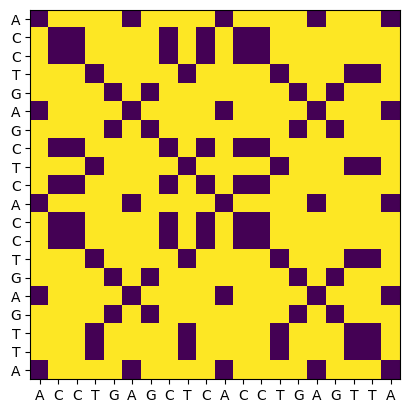

In [61]:
# Call the function
FancyDotPlot(seq_X, seq_Y)


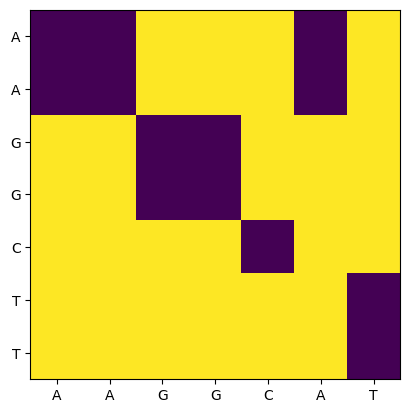

In [62]:
FancyDotPlot(seqA, seqC)

<u>Creating and displaying dotplot using ASCII characters</u>

In [65]:
# Define plotMatrix function
# --------------------------
# This function print out the matrix of match scores in a user-friendly way.

# Param:
# Mat: a two-dimensional list representing the matrix of match scores
# t: an integer representing the threshold for determining whether a match score should be considered significant
# seq1: a string representing the first sequence
# seq2: a string representing the second sequence
# nonblank: a character that is used to represent significant match scores
# blank: a character that is used to represent insignificant match scores

def plotMatrix(Mat, t, seq1, seq2, nonblank = chr(0x25A0) , blank = ' '):
    print(' |' + seq2)
    print('-' * (2 + len(seq2)))

    for label, row in zip(seq1, Mat):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

In [66]:
# Define dotplot Function
# -----------------------
# The dotplot function creates a dot plot for two sequences.

# Param:
# seq1: a string representing the first sequence
# seq2: a string representing the second sequence
# k: an integer representing the length of the k-mer used to compare the sequences (default value is 1)
# t: an integer representing the threshold for determining whether a match score should be considered significant (default value is 1)
# The function first creates a match score matrix M by calling the makeMatrix function, passing in the two sequences and the k-mer length k.

def dotplot(seq1, seq2, k = 1, t = 1):
    Mat = makeMatrix(seq1, seq2, k)
    plotMatrix(Mat, t, seq1, seq2)

In [67]:
# Run Dot Plot function

dotplot(seq_X, seq_Y)

 |ACCTGAGCTCACCTGAGTTA
----------------------
A|■    ■    ■    ■   ■
C| ■■    ■ ■ ■■       
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
G|    ■ ■       ■ ■   
A|■    ■    ■    ■   ■
G|    ■ ■       ■ ■   
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
C| ■■    ■ ■ ■■       
A|■    ■    ■    ■   ■
C| ■■    ■ ■ ■■       
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
G|    ■ ■       ■ ■   
A|■    ■    ■    ■   ■
G|    ■ ■       ■ ■   
T|   ■    ■    ■   ■■ 
T|   ■    ■    ■   ■■ 
A|■    ■    ■    ■   ■


*Read more : https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python*